# Introduction to Neural Networks
Guided by Linkedin Learning Course by Jonathan Fernandes

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
#confirming the image is 28 by 28
X_train[0].shape

(28, 28)

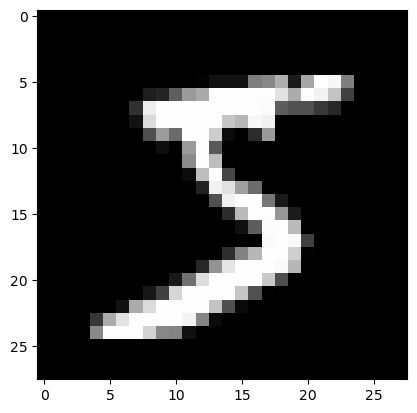

In [5]:
#examining the first digit
plt.imshow(X_train[0],
           cmap='gray')
plt.show()

In [6]:
#confirms that our corresponding training result is a 5
y_train[0]
#checks out

5

## Preprocessing the image data

In [7]:
image_height, image_width = 28,28

In [8]:
# to use this in our neural network we want to have a single line that is 784 across (because 28x28=784)
# gives us one layer with 784 neurons across
X_train_reshaped = X_train.reshape(60000, image_height*image_width)
X_test_reshaped = X_test.reshape(10000, image_height*image_width)
print(X_train_reshaped.shape)
print(X_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [9]:
# We want to rescale our data from 0 to 1 (currently it's between 0 and 255)
# if we convert to float first there will be no surprises when we scale
print(X_train_reshaped[0])
X_train_reshaped = X_train_reshaped.astype('float')
X_test_reshaped = X_test_reshaped.astype('float')


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
X_train_scaled = X_train_reshaped / 255.0
X_test_scaled = X_test_reshaped / 255.0

In [11]:
# now we can see that they're all between 0 and 1
print(X_train_scaled[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [12]:
# We have just reshaped our data to be a single layer with 784 nodes
# Our OUTPUT is going to be ten different classes one for each digit
# let's check out our output
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [13]:
# now we can see that we've one from a one dimensional array to one with ten separate bins or classes
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)

(60000, 10)
(10000, 10)


## Build a model

In [14]:
model = Sequential()

In [15]:
model.add(Dense(512, activation='relu',input_shape=(784,)))
model.add(Dense(512, activation='relu')) # we don't need to specify the input now
model.add(Dense(10, activation='softmax'))

## Compile the model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# How do we get the above Param # (number of parameters)?
# originally 784 inputs
# terminating into 512 nodes
# include a bias
print('First Layer:', (784*512)+512)
print('Second Layer:', (512*512)+512)
print('Output Layer:', (512*10)+10)

First Layer: 401920
Second Layer: 262656
Output Layer: 5130


## Train the model

In [19]:
#early_stopping rounds stops the training early if the validation accuracy doesn't improve for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience = 5)
history = model.fit(X_train_scaled,
                    y_train_one_hot,
                    epochs=25,
                    callbacks=[early_stopping],
                    validation_data=(X_test_scaled,y_test_one_hot))

Epoch 1/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1836 - accuracy: 0.9442 - val_loss: 0.0960 - val_accuracy: 0.9687
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0795 - accuracy: 0.9747 - val_loss: 0.1214 - val_accuracy: 0.9633
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0562 - accuracy: 0.9816 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0659 - val_accuracy: 0.9809
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0725 - val_accuracy: 0.9805
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0901 - val_accuracy: 0.9773
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0259 - accuracy: 0.9921 - val_loss: 0.0986 - val_accuracy:

## What is the accuracy of the model?

### Plot the accuracy of the training model

Text(0, 0.5, 'Model Accuracy')

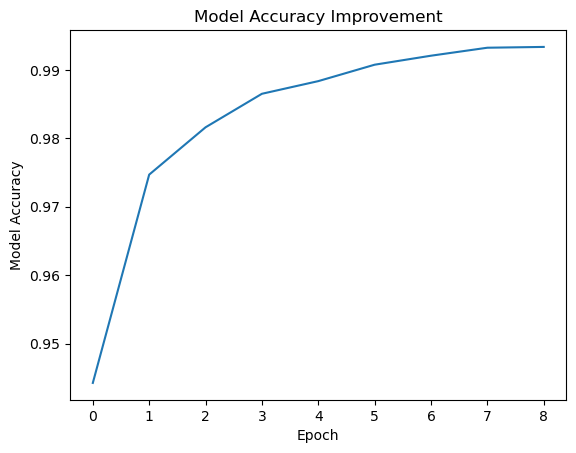

In [20]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Improvement')
plt.xlabel('Epoch')
plt.ylabel('Model Accuracy')

### Plot the accuracy of training and validation set

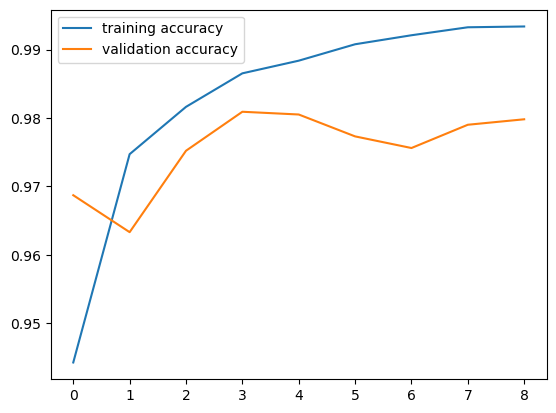

In [21]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()

### Accuracy of training and validation with loss

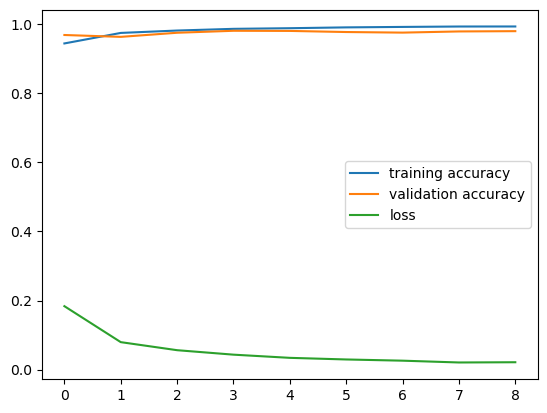

In [22]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()

In [23]:
# Evaluating the model
score = model.evaluate(X_test_scaled, y_test_one_hot)
print(score)

313/313 [==============================] - 0s 773us/step - loss: 0.0963 - accuracy: 0.9798
[0.09628942608833313, 0.9797999858856201]


## Run a prediction

In [25]:
# saving the model
model.save('model.keras')

In [26]:
# loading the model
model = load_model('model.keras')

In [27]:
# predicting with the training data
predictions = model.predict(X_test_scaled)

313/313 [==============================] - 0s 765us/step


In [35]:
# getting labels from predictions
predicted_labels = np.argmax(predictions, axis=1)

#print(predicted_labels.shape)
#print(y_test.shape)
#### I had a BIG ISSUE here and it was that everything was differently sized
# Solution: I went back and created new variables for when X was transformed and
# y was one hot encoded

# visualizing accuracy
accuracy = np.mean(predicted_labels == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9798


## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Convolution Neural Network

## Import the libraries

In [36]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [37]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [39]:
num_classes = 10
epochs = 3
batch_size = 128

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.0
X_test /= 255.0

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

batch_size = 128

In [40]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [43]:
# This model architecture taken directly from Jon Fernandes Linkedin Learning video
# kernel_size is the filter size

# Instantiating model
cnn = Sequential()

# First Layer: Convolution
cnn.add(Conv2D(32,
               kernel_size=(5,5),
               input_shape=(28,28,1),
               padding='same',
               activation='relu'))
        
# Second Layer: Max Pooling
cnn.add(MaxPooling2D())

# Third Layer: Convultion
cnn.add(Conv2D(64,
               kernel_size=(5,5),
               padding='same',
               activation='relu'))
        
# Fourth Layer: Max Pooling
cnn.add(MaxPooling2D())

# Fifth Layer: Flatten
cnn.add(Flatten()) # we have to do this because we have a fully connected layer coming next

# Sixth Layer: Dense (Fully connected layer)
cnn.add(Dense(1024,
              activation='relu'))

# Seventh Layer: Output layer
cnn.add(Dense(10,
              activation='softmax'))

In [45]:
# Compiling model
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [47]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [49]:
# this works but it takes fifteen-twenty minutes to finish
history_cnn = cnn.fit(X_train,
                      y_train,
                      epochs=20,
                      verbose=1,
                      validation_data=(X_train,y_train))

Epoch 1/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0916 - accuracy: 0.9714 - val_loss: 0.0331 - val_accuracy: 0.9899
Epoch 2/20
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0188 - val_accuracy: 0.9941
Epoch 3/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0146 - val_accuracy: 0.9951
Epoch 4/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0128 - val_accuracy: 0.9960
Epoch 5/20
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0089 - val_accuracy: 0.9972
Epoch 6/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.0123 - val_accuracy: 0.9959
Epoch 7/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.0047 -

Recall that when using neural networks we got good accuracy.

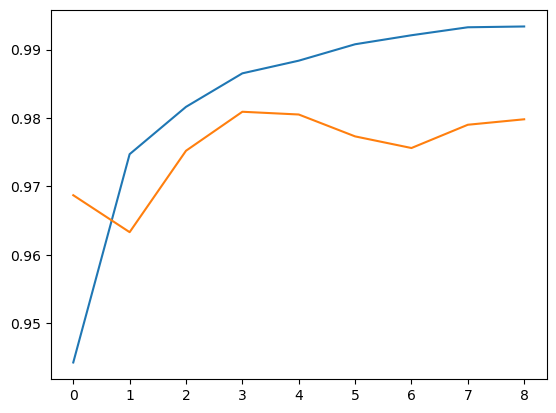

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Comparing this to using CNNs - the performance is far superior.

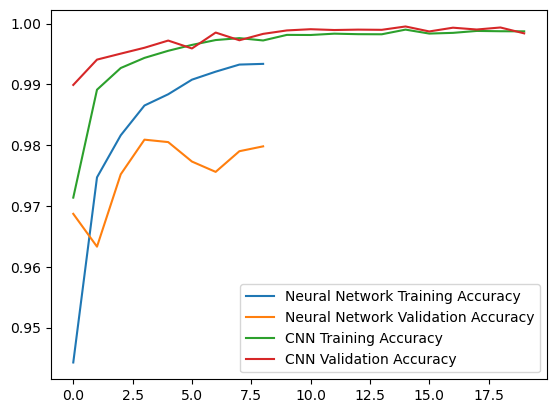

In [55]:
plt.plot(history.history['accuracy'], label='Neural Network Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Neural Network Validation Accuracy')
plt.plot(history_cnn.history['accuracy'], label = 'CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'CNN Validation Accuracy')
plt.legend()

In [58]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0745 - accuracy: 0.9894
